In [118]:
import numpy as np
import matplotlib.pyplot as plt

Notebook that aims to build my intuition on gradient descent, loss functions and learning rates<br>
This uses a simple linear regression to show how model parameters are updated by gradient descent using RMSE as a loss function<br><br>
Data taken from Deep Learning with PyTorch, but here only using Numpy <br>
Some help taken from https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html

In [119]:
y = np.array([0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0])
x = np.array([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

x is an array of temperatures in fahrenheit, y equivalent in celcius<br>
Can gradient descent be used to estimate weight and bias parameters for a linear formula to convert fahrenheit to celcius?

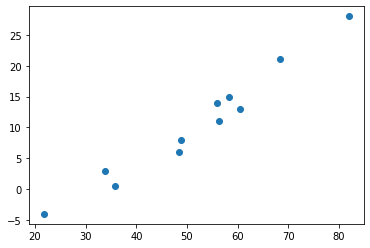

In [120]:
plt.scatter(x, y)

In [121]:
def lin_pred(x, w, b):
  """linear function"""
  return x * w + b

In [122]:
def rmse(y_pred, y):
  """loss function, rmse used"""
  return ((y_pred - y)**2).mean()

In [123]:
#Test the rmse with initial parameters
y_pred = lin_pred(x, 0, 5)
rmse(y_pred, y)

107.38636363636364

For gradient descent, need to calculate the derivative of the loss function (RMSE) with respect to w and b to create a gradient vector. The gradient values are multiplied by the learning rate and then subtracted from the current w and b for the next iteration. For the next iteration, RMSE is calculated again, derivatives calculated and a new gradient vector used to update w and b and the process repeats.

Chain rule states:

$\dfrac{\mathrm{d}f}{\mathrm{d}w} = \dfrac{\mathrm{d}f}{\mathrm{d}x} \dfrac{\mathrm{d}x}{\mathrm{d}w}$ and $\dfrac{\mathrm{d}f}{\mathrm{d}b} = \dfrac{\mathrm{d}f}{\mathrm{d}x} \dfrac{\mathrm{d}x}{\mathrm{d}b}$

This means to calculate the gradient vector for w and b with respect to the RMSE function, we calculate the derivative of the RMSE function with respect to the output of the model (recalling derivative of x^2 = 2x) multiplied by the derivative of the model with respect to the parameter (weight or bias).

In [124]:
def d_rmse(y_pred, y):
  """the derivative of rmse function
  the derivative of f(x) = x**2 is f'(x)= 2*x
  the rmse function is ((y_pred - y)**2) therefore:"""
  return 2*(y-y_pred)

In [125]:
def d_w(y, x, w, b):
  """here need to take the derivative of the inner function
  y - (x * w + b) with respect to w
  y - (x * w + b) = y - x * w - b = 0 - x - 0 = -x """
  return -x

In [126]:
def d_b(y, x, w, b):
  """here need to take the derivative of the inner function
  y - (x * w + b) with respect to b
  y - (x * w + b) = y - x * w - b = 0 - 0 - 1 = -1 """
  return -1

In [127]:
def grad_fn(x, y, y_pred, w, b):
  """want to return the gradient vector for w and b
  with respect to the loss function rmse"""
  dloss_ypred = d_rmse(y_pred, y)
  dloss_w = dloss_ypred * d_w(y, x, w, b) #applying the chain rule
  dloss_b = dloss_ypred * d_b(y, x, w, b) #applying the chain rule
  return np.array([dloss_w.mean(), dloss_b.mean()]) 


In [128]:
w = 0
b = 0
y_pred = lin_pred(x, w, b)
grad_fn(x, y, y_pred, w, b)

array([-1364.3,   -21. ])

Above result shows that the two grad values for w and b are different orders of magnitude and so the learning rate to update one sensibly will be too small for the other. One way to solve this is to scale the values so in -1 to 1 range (min max scaling). However in this case we know works well if simple multiply x by 0.1

In [129]:
x = x*0.1
y_pred = lin_pred(x, w, b)
grad_fn(x, y, y_pred, w, b)

array([-136.43,  -21.  ])

In [130]:
def training_loop(n_epochs, learning_rate, params, x, y):
  """iterate over n epochs. For each iteration a new grad
  of w,b with respect to loss function is calculated and
  learning rate * grad is used to update w and b.
  The loss after every 100 iterations is stored in a list and
  returned for plotting"""
  loss_vals =[]
  for epoch in range(0, n_epochs+1):
    w, b = params
    y_pred = lin_pred(x, w, b)
    loss = rmse(y_pred, y)
    grad = grad_fn(x, y, y_pred, w, b)
    params -= learning_rate * grad
    #print every 100 iterations
    if epoch % 100 ==0:
        loss_vals.append(loss)
        print(f"epoch: {epoch} weight: {params[0]} bias: {params[1]} loss: {loss}")
  return loss_vals, w, b

In [131]:
training_loss, w, b = training_loop(5000, 0.01, [0, 0], x, y)

epoch: 0 weight: 1.3643 bias: 0.21 loss: 187.38636363636363
epoch: 100 weight: 2.7342259414252648 bias: -2.397056118790444 loss: 22.459697581227907
epoch: 200 weight: 3.1459794955058857 bias: -4.727918563979814 loss: 16.829406108479255
epoch: 300 weight: 3.4933543054368017 bias: -6.694344574996666 loss: 12.82209731319516
epoch: 400 weight: 3.786416156096415 bias: -8.353314740646871 loss: 9.96993169113339
epoch: 500 weight: 4.033657020594096 bias: -9.75290058577831 loss: 7.939928726239765
epoch: 600 weight: 4.242241129852861 bias: -10.933657526711324 loss: 6.495092561887586
epoch: 700 weight: 4.418212568569782 bias: -11.929800034447648 loss: 5.466743550619355
epoch: 800 weight: 4.566670413005514 bias: -12.770193058040736 loss: 4.7348254860888375
epoch: 900 weight: 4.69191648552276 bias: -13.479188436331395 loss: 4.213889454336911
epoch: 1000 weight: 4.797580007316559 bias: -14.077330534522954 loss: 3.8431179672968594
epoch: 1100 weight: 4.886722761364447 bias: -14.581951552633925 loss: 

The final parameters have settled at 5.37 and -17.3. As x was multiplied by 0.1, w should actually be 0.537.
How well does this calculate 32F = 0C:

In [134]:
32*(w/10) + b

-0.12652003077642604

Plot the loss over the iterations

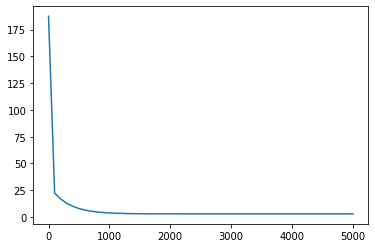

In [135]:
plt.plot([i for i in range(0, 5100, 100)], training_loss)